In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv('global-data-on-sustainable-energy.csv')
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [3]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [4]:
# Display the basic information about the DataFrame
print("Initial DataFrame Info:")
print(df.info())

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electrici

In [5]:
# Handling missing values
df = df.dropna()
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
43,Algeria,2001,98.96687,97.30,8.79,810000.0,0.43,24.96,0.0,0.07,...,9961.640,4.07,78650.00000,0.065218,3.000000,1740.606654,18,2381741.0,28.033886,1.659626
44,Algeria,2002,98.95306,97.80,8.68,310000.0,0.51,25.94,0.0,0.06,...,10180.350,4.12,82400.00153,0.051677,5.600000,1781.828908,18,2381741.0,28.033886,1.659626
45,Algeria,2003,98.93401,98.00,8.57,90000.0,0.47,27.54,0.0,0.26,...,10510.461,4.08,88190.00244,0.228104,7.200000,2103.381291,18,2381741.0,28.033886,1.659626
46,Algeria,2004,98.91208,98.20,8.46,140000.0,0.44,29.14,0.0,0.25,...,10759.022,3.96,89489.99786,0.206787,4.300000,2610.185422,18,2381741.0,28.033886,1.659626
47,Algeria,2005,98.88961,98.50,8.34,160000.0,0.58,31.36,0.0,0.55,...,11113.723,3.90,94190.00244,0.434119,5.900000,3113.094883,18,2381741.0,28.033886,1.659626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,Uzbekistan,2015,100.00000,85.35,60.83,270000.0,1.71,47.55,0.0,7.00,...,17386.195,7.86,99169.99817,3.012993,7.218774,2753.971072,79,447400.0,41.377491,64.585262
3560,Uzbekistan,2016,100.00000,85.20,59.88,690000.0,1.61,48.75,0.0,7.25,...,16374.342,7.82,105230.00340,3.567936,5.932151,2704.677188,79,447400.0,41.377491,64.585262
3561,Uzbekistan,2017,100.00000,84.90,58.24,60130000.0,1.75,49.71,0.0,8.35,...,16642.676,7.88,109529.99880,3.972285,4.395275,1916.764642,79,447400.0,41.377491,64.585262
3562,Uzbekistan,2018,100.00000,84.30,59.09,84130000.0,1.49,53.58,0.0,5.85,...,16445.740,9.05,112470.00120,2.927033,5.354997,1597.068337,79,447400.0,41.377491,64.585262


In [6]:
# Convert 'Year' column to datetime type
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

C:\Users\500782~1\AppData\Local\Temp/ipykernel_6464/3262343578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')


In [7]:
# Convert 'Access to clean fuels for cooking' column to boolean
df['Access to clean fuels for cooking'] = df['Access to clean fuels for cooking'].astype(bool)

C:\Users\500782~1\AppData\Local\Temp/ipykernel_6464/3112370739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Access to clean fuels for cooking'] = df['Access to clean fuels for cooking'].astype(bool)


In [8]:
# Convert relevant columns to numeric types
numeric_columns = ['Access to electricity (% of population)',
                   'Renewable-electricity-generating-capacity-per-capita',
                   'Financial flows to developing countries (US $)',
                   'Renewable energy share in the total final energy consumption (%)',
                   'Electricity from fossil fuels (TWh)',
                   'Electricity from nuclear (TWh)',
                   'Electricity from renewables (TWh)',
                   'Low-carbon electricity (% electricity)',
                   'Primary energy consumption per capita (kWh/person)',
                   'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                   'Value_co2_emissions_kt_by_country',
                   'Renewables (% equivalent primary energy)',
                   'gdp_growth', 'gdp_per_capita', 'Density\n(P/Km2)',
                   'Land Area(Km2)', 'Latitude', 'Longitude']

In [9]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [10]:
# Convert 'Year' column to datetime type
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

C:\Users\500782~1\AppData\Local\Temp/ipykernel_6464/3262343578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')


In [11]:
# Convert 'Access to clean fuels for cooking' column to boolean
df['Access to clean fuels for cooking'] = df['Access to clean fuels for cooking'].astype(bool)

# Select only the relevant numeric columns that exist after dropping missing values
numeric_columns = df.select_dtypes(include='number').columns

# Convert selected columns to numeric types
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


C:\Users\500782~1\AppData\Local\Temp/ipykernel_6464/30041186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Access to clean fuels for cooking'] = df['Access to clean fuels for cooking'].astype(bool)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [12]:
# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df.head())


Cleaned DataFrame:
     Entity       Year  Access to electricity (% of population)  \
43  Algeria 2001-01-01                                 98.96687   
44  Algeria 2002-01-01                                 98.95306   
45  Algeria 2003-01-01                                 98.93401   
46  Algeria 2004-01-01                                 98.91208   
47  Algeria 2005-01-01                                 98.88961   

    Access to clean fuels for cooking  \
43                               True   
44                               True   
45                               True   
46                               True   
47                               True   

    Renewable-electricity-generating-capacity-per-capita  \
43                                               8.79      
44                                               8.68      
45                                               8.57      
46                                               8.46      
47                            

In [13]:
# Display basic information about the cleaned DataFrame
print("\nCleaned DataFrame Info:")
print(df.info())


Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 43 to 3563
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype         
---  ------                                                            --------------  -----         
 0   Entity                                                            343 non-null    object        
 1   Year                                                              343 non-null    datetime64[ns]
 2   Access to electricity (% of population)                           343 non-null    float64       
 3   Access to clean fuels for cooking                                 343 non-null    bool          
 4   Renewable-electricity-generating-capacity-per-capita              343 non-null    float64       
 5   Financial flows to developing countries (US $)                    343 non-null    float64       
 6   Renewable energy share in the total final energ

Mean Squared Error: 39.48228275030438
R-squared: 0.8609826047230753


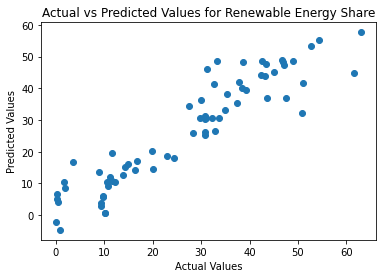

In [15]:
df.columns = df.columns.str.replace('\n', '_')

features = [
    'Access to electricity (% of population)',
    'Renewable-electricity-generating-capacity-per-capita',
    'Financial flows to developing countries (US $)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)',
    'Low-carbon electricity (% electricity)',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Value_co2_emissions_kt_by_country',
    'Renewables (% equivalent primary energy)',
    'gdp_growth',
    'gdp_per_capita',
    'Land Area(Km2)',
    'Latitude',
    'Longitude'
]

target = 'Renewable energy share in the total final energy consumption (%)'

X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Renewable Energy Share')
plt.show()

In [17]:
# Assuming you have a categorical target variable 'HighRenewable' indicating high or low renewable energy share
df['HighRenewable'] = df['Renewable energy share in the total final energy consumption (%)'] > df['Renewable energy share in the total final energy consumption (%)'].median()

# Select features and target variable
features_classification = features  # Use the same features as before
target_classification = 'HighRenewable'

X_classification = df[features_classification]
y_classification = df[target_classification]

# Split the dataset into training and testing sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# Create a logistic regression model
model_classification = LogisticRegression()

# Fit the model to the training data
model_classification.fit(X_train_classification, y_train_classification)

# Make predictions on the testing data
y_pred_classification = model_classification.predict(X_test_classification)

# Evaluate the classification model
accuracy = accuracy_score(y_test_classification, y_pred_classification)
conf_matrix = confusion_matrix(y_test_classification, y_pred_classification)
class_report = classification_report(y_test_classification, y_pred_classification)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.6666666666666666
Confusion Matrix:
[[26  2]
 [21 20]]
Classification Report:
              precision    recall  f1-score   support

       False       0.55      0.93      0.69        28
        True       0.91      0.49      0.63        41

    accuracy                           0.67        69
   macro avg       0.73      0.71      0.66        69
weighted avg       0.76      0.67      0.66        69



C:\Users\500782~1\AppData\Local\Temp/ipykernel_6464/2595701034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HighRenewable'] = df['Renewable energy share in the total final energy consumption (%)'] > df['Renewable energy share in the total final energy consumption (%)'].median()


In [ ]:
!pip install pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data)
profile

In [ ]:
profile.to_file("output.html")